Importing All Libraries

In [2]:
# Importing dependencies
import pandas as pd
import numpy as np
from pandas import read_excel
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from mord import LogisticAT, LogisticIT
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.svm import SVR

Read the dataset and store it into pandas dataframe

In [3]:
df = pd.read_csv("/content/amazon_reviews_small.csv")

Checking the dataset
1. copy dataset into reviews variable
2. display first five rows of the dataset

In [4]:
reviews = df.copy()
reviews.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


 Renaming the columns of a DataFrame called 'reviews' to match a specified list of column names.







In [5]:

reviews.columns = ['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand', 'categories','primaryCategories', 'imageURLs',
       'keys', 'manufacturer', 'manufacturerNumber','reviews.date', 'reviews.dateAdded', 'reviews.dateSeen','reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs']

Finding duplicate rows in the dataset and storing it into duplicate_rows variable

In [6]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
1736,AVqVGZSEQMlgsOJE6eUc,2017-03-03T16:56:06Z,2018-09-21T18:45:21Z,"Kindle E-reader - White, 6 Glare-Free Touchscr...",B017JG41PC,Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",https://www.barcodable.com/images/barcode/0841...,"841667100418,0841667100418,amazonkindlewhite/5...",...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5435001/revie...,"My wife loves to read, but she was always hesi...",My wife loves it,ianmckaye,https://reviews.bestbuy.com/3545/5435001/revie...
1844,AVqVGZSEQMlgsOJE6eUc,2017-03-03T16:56:06Z,2018-09-21T18:45:21Z,"Kindle E-reader - White, 6 Glare-Free Touchscr...",B017JG41PC,Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",https://www.barcodable.com/images/barcode/0841...,"841667100418,0841667100418,amazonkindlewhite/5...",...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5435001/review...,"Not the paperwhite, but for the price I paid w...",It is what it is,2112,https://reviews.bestbuy.com/3545/5435001/revie...
1871,AVqVGZSEQMlgsOJE6eUc,2017-03-03T16:56:06Z,2018-09-21T18:45:21Z,"Kindle E-reader - White, 6 Glare-Free Touchscr...",B017JG41PC,Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",https://www.barcodable.com/images/barcode/0841...,"841667100418,0841667100418,amazonkindlewhite/5...",...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5435001/revie...,I had the 4th generation. I am quite happy wit...,A good upgrade,Mitz,https://reviews.bestbuy.com/3545/5435001/revie...
1933,AVqkIhkhv8e3D1O-lebZ,2017-03-06T14:59:42Z,2018-09-21T18:45:21Z,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHBBG04,Amazon,"Fire Tablets,Tablets,All Tablets,Amazon Tablets",Electronics,https://www.upccodesearch.com/images/barcode/0...,"amazon/53004763,0841667105758,allnewfirehd8tab...",...,2017-04-04T00:00:00Z,True,NaN,0,4,http://reviews.bestbuy.com/3545/5620400/review...,This tablet is great for my son. Would be nice...,Solid tablet!,Weiser,http://reviews.bestbuy.com/3545/5620400/review...
1936,AVqVGZSEQMlgsOJE6eUc,2017-03-03T16:56:06Z,2018-09-21T18:45:21Z,"Kindle E-reader - White, 6 Glare-Free Touchscr...",B017JG41PC,Amazon,"Office,eBook Readers,Electronics Features,Walm...","Office Supplies,Electronics",https://www.barcodable.com/images/barcode/0841...,"841667100418,0841667100418,amazonkindlewhite/5...",...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5435001/review...,I prefer the Kindle to a book. I like the chan...,"I've had one before, so I knew I'd be happy",horseman,https://reviews.bestbuy.com/3545/5435001/revie...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,AVqVGZN9QMlgsOJE6eUZ,2017-03-03T16:56:05Z,2017-09-06T17:28:12Z,Kindle Oasis E-reader with Leather Charging Co...,B00REQKWGA,Amazon,"Kindle E-readers,Electronics Features,Computer...",Electronics,https://images-na.ssl-images-amazon.com/images...,"0848719057331,kindleoasisereaderwithleathercha...",...,"2017-08-09T17:17:00.000Z,2017-04-26T10:39:00.0...",True,NaN,1,5,http://reviews.bestbuy.com/3545/5195001/review...,New to eBooks and researched available eReader...,Great eBooks reader,Rick,"https://www.barcodable.com/upc/848719057331,ht..."
4790,AVqVGZN9QMlgsOJE6eUZ,2017-03-03T16:56:05Z,2017-09-06T17:28:12Z,Kindle Oasis E-reader with Leather Charging Co...,B00REQKWGA,Amazon,"Kindle E-readers,Electronics Features,Computer...",Electronics,https://images-na.ssl-images-amazon.com/images...,"0848719057331,kindleoasisereaderwithleathercha...",...,"2017-07-31T23:19:00.000Z,2017-08-01T07:38:00.0...",True,NaN,0,5,http:

Removing duplicate rows from the dataset

In [7]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
df_cleaned

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
4,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:06:48.451Z,2017-06-07T08:20:48.408Z",True,NaN,0,5,http://reviews.bestbuy.com/3545/5025900/review...,This is a great tablet for the price. Amazon i...,Good product,litle,"https://www.barcodable.com/upc/841667103150,ht..."
4996,AVqkIdZiv8e3D1O-leaJ,2017-03-06T14:59:25Z,2017-09-04T11:19:31Z,"Fire Tablet with Alexa, 7"" Display, 16 GB, Mag...",B018Y224PY,Amazon,"Tablets,Fire Tablets,Electronics,iPad & Tablet...",Electronics,https://images-na.ssl-images-amazon.com/images...,"841667103150,0841667103150,firetabletwithalexa...",...,"2017-04-30T02:07:00.236Z,2017-06-07T08:20:55.199Z",True,NaN,1,5,http://reviews.bestbuy.com/3545/5025900/review...,This table

Displaying the first five rows of the cleaned dataset after removing duplicates rows from the dataset.

In [8]:
# Inspect cleaned dataset
print(df_cleaned.head())

                     id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,

 How many different unique values are present in each column of the cleaned DataFrame.

In [9]:
df_cleaned.nunique()

id                       24
dateAdded                20
dateUpdated              17
name                     23
asins                    24
brand                     1
categories               23
primaryCategories         4
imageURLs                24
keys                     24
manufacturer              1
manufacturerNumber       24
reviews.date            679
reviews.dateAdded       381
reviews.dateSeen        417
reviews.doRecommend       2
reviews.id               26
reviews.numHelpful       29
reviews.rating            5
reviews.sourceURLs     2827
reviews.text           4385
reviews.title          3124
reviews.username       3814
sourceURLs               24
dtype: int64

 Checking for missing values in each column of the DataFrame 'df_cleaned', and then creates a bar plot showing the count of null values for each attribute in the dataset.

<Axes: title={'center': 'null values of Attributes'}>

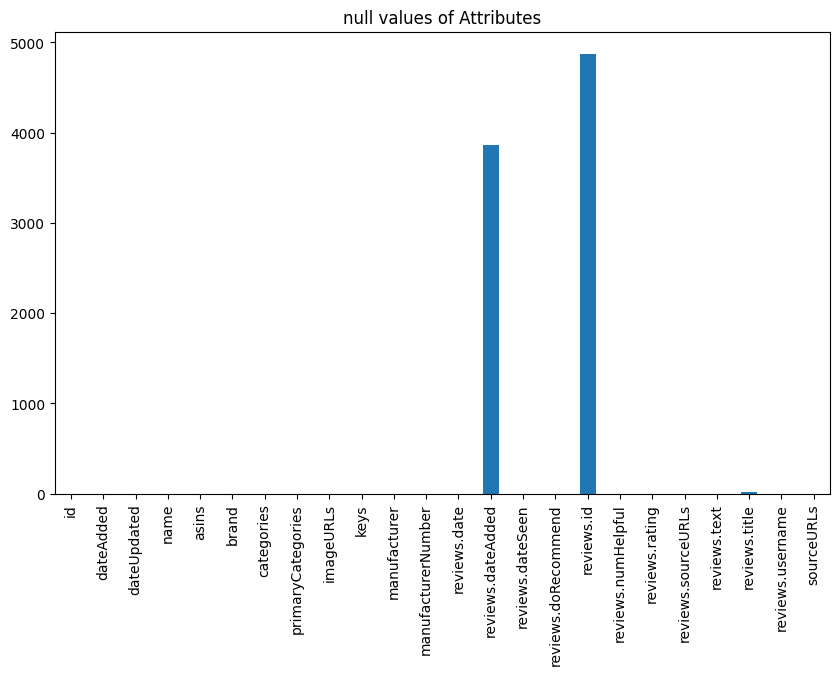

In [10]:
df_cleaned.isnull().sum()
rev_null=df_cleaned.isnull().sum()
rev_null.plot(kind='bar',figsize=(10,6), title='null values of Attributes')

In [11]:
df_cleaned.isnull().sum()

id                        0
dateAdded                 0
dateUpdated               0
name                      0
asins                     0
brand                     0
categories                0
primaryCategories         0
imageURLs                 0
keys                      0
manufacturer              0
manufacturerNumber        0
reviews.date              0
reviews.dateAdded      3861
reviews.dateSeen          0
reviews.doRecommend       0
reviews.id             4876
reviews.numHelpful        0
reviews.rating            0
reviews.sourceURLs        0
reviews.text              0
reviews.title            13
reviews.username          1
sourceURLs                0
dtype: int64

Each column in the DataFrame 'df_cleaned', and if the column is of type 'object' (categorical), it replaces missing values with the mode (most frequent value) of that column. For numeric columns, it replaces missing values with the median.

In [12]:
for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        # For categorical columns, replace missing values with the mode
        mode_value = df_cleaned[col].mode()[0]
        df_cleaned[col].fillna(mode_value, inplace=True)
    else:
        # For numeric columns, replace missing values with the median
        median_value = df_cleaned[col].median()
        df_cleaned[col].fillna(median_value, inplace=True)

<ipython-input-12-8d904522c2da>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(mode_value, inplace=True)
<ipython-input-12-8d904522c2da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(median_value, inplace=True)
<ipython-input-12-8d904522c2da>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col].fillna(median_value, inplace=True)
<ipython-input-12-8d904522c2da>:9: SettingWit

In [13]:
df_cleaned.isnull().sum()

id                     0
dateAdded              0
dateUpdated            0
name                   0
asins                  0
brand                  0
categories             0
primaryCategories      0
imageURLs              0
keys                   0
manufacturer           0
manufacturerNumber     0
reviews.date           0
reviews.dateAdded      0
reviews.dateSeen       0
reviews.doRecommend    0
reviews.id             0
reviews.numHelpful     0
reviews.rating         0
reviews.sourceURLs     0
reviews.text           0
reviews.title          0
reviews.username       0
sourceURLs             0
dtype: int64

In [14]:
df_cleaned.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.905000e+03,4905.000000,4905.000000
mean,1.880627e+08,0.310499,4.598573
std,1.583766e+06,3.129678,0.726815
min,1.082112e+08,0.000000,1.000000
25%,1.880757e+08,0.000000,4.000000
50%,1.880757e+08,0.000000,5.000000
75%,1.880757e+08,0.000000,5.000000
max,2.027812e+08,105.000000,5.000000


from matplotlib import pyplot as plt
_df_0['reviews.id'].plot(kind='hist', bins=20, title='reviews.id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['reviews.numHelpful'].plot(kind='hist', bins=20, title='reviews.numHelpful')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['reviews.rating'].plot(kind='hist', bins=20, title='reviews.rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='reviews.id', y='reviews.numHelpful', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='reviews.numHelpful', y='reviews.rating', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['reviews.id'].plot(kind='line', figsize=(8, 4), title='reviews.id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['reviews.numHelpful'].plot(kind='line', figsize=(8, 4), title='reviews.numHelpful')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['reviews.rating'].plot(kind='line', figsize=(8, 4), title='reviews.rating')
plt.gca().spines[['top', 'right']].set_visible(False)

This function called detect_outliers_zscore() which utilizes Z-score to identify outliers in numeric data. It then iterates over each numeric column in the DataFrame df_cleaned, applies the outlier detection function, and replaces any detected outliers with NaN values. Finally, it prints the DataFrame after the outlier replacement process.

1. Z-score helps identify how many standard deviations a data point is away from the mean. If the Z-score of a data point is greater than a certain threshold (commonly 2 or 3), it is considered an outlier. This threshold is based on the assumption that data points beyond 2 or 3 standard deviations from the mean are rare occurrences in a normal distribution. Outliers detected using Z-score can be replaced or treated accordingly, such as by imputing missing values or removing them from the dataset.

In [15]:
# Function to detect outliers using Z-score
def detect_outliers_zscore(data):
    threshold = 3  # Set the threshold for outlier detection
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(x - mean) / std_dev for x in data]
    return np.abs(z_scores) > threshold

# Detect outliers in numeric columns using Z-score
numeric_columns = df_cleaned.select_dtypes(include=np.number).columns  # Select only numeric columns
for col in numeric_columns:
    outliers = detect_outliers_zscore(df_cleaned[col])
    df_cleaned.loc[outliers, col] = np.nan  # Replace outliers with NaN

print("DataFrame after replacing outliers with NaN:")
print(df)

DataFrame after replacing outliers with NaN:
                        id             dateAdded           dateUpdated  \
0     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
3     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
4     AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
...                    ...                   ...                   ...   
4995  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4996  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4997  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4998  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   
4999  AVqkIdZiv8e3D1O-leaJ  2017-03-06T14:59:25Z  2017-09-04T11:19:31Z   

                                                   name       asin

Checking the dataset of all the features

In [16]:
df_cleaned.dtypes

id                      object
dateAdded               object
dateUpdated             object
name                    object
asins                   object
brand                   object
categories              object
primaryCategories       object
imageURLs               object
keys                    object
manufacturer            object
manufacturerNumber      object
reviews.date            object
reviews.dateAdded       object
reviews.dateSeen        object
reviews.doRecommend       bool
reviews.id             float64
reviews.numHelpful     float64
reviews.rating         float64
reviews.sourceURLs      object
reviews.text            object
reviews.title           object
reviews.username        object
sourceURLs              object
dtype: object

This aims to identify problematic values, such as non-numeric, NaN, or infinite values, in the 'reviews.rating' column of the DataFrame df_cleaned.

problematic_values captures any values in the 'reviews.rating' column that are not numeric.
The count of NaN values and infinite values in the 'reviews.rating' column is printed using the isna() and isin() functions, respectively.
This process helps ensure data integrity and identifies any anomalies or inconsistencies in the 'reviews.rating' column.








In [17]:
# Identify problematic values in 'reviews.rating'
problematic_values = df_cleaned['reviews.rating'][~df_cleaned['reviews.rating'].astype(str).str.isdigit()]
print("Problematic values:", problematic_values)

# Check if there are NaN or infinite values in 'reviews.rating'
print("NaN values count:", df_cleaned['reviews.rating'].isna().sum())
print("Infinite values count:", df_cleaned['reviews.rating'].isin([np.inf, -np.inf]).sum())

Problematic values: 0       3.0
1       5.0
2       4.0
3       5.0
4       5.0
       ... 
4995    5.0
4996    5.0
4997    4.0
4998    5.0
4999    5.0
Name: reviews.rating, Length: 4905, dtype: float64
NaN values count: 112
Infinite values count: 0


This imputes missing values in the 'reviews.rating' column of the DataFrame df_cleaned with the mean of the column.

First, the mean of the 'reviews.rating' column is calculated using the mean() function.
Then, missing values in the 'reviews.rating' column are replaced with the calculated mean using the fillna() function.
Imputing missing values with the mean helps maintain the overall distribution of the data and ensures that the imputed values are representative of the existing data.







In [18]:
# Impute missing values with the mean of the column
mean_rating = df_cleaned['reviews.rating'].mean()
df_cleaned['reviews.rating'] = df_cleaned['reviews.rating'].fillna(mean_rating)

<ipython-input-18-445c93c75896>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['reviews.rating'] = df_cleaned['reviews.rating'].fillna(mean_rating)


Converts columns to datetime format:

1. 'dateAdded', 'dateUpdated', and 'reviews.dateAdded' columns are converted to datetime format using pd.to_datetime() function with the specified format string '%Y-%m-%dT%H:%M:%SZ'.
Converts 'reviews.rating' column to integer:

2. The 'reviews.rating' column is cast to integer type using the astype() function.
Handles parsing errors in 'reviews.dateSeen' column:

3. Attempts to convert the 'reviews.dateSeen' column to datetime format with the specified format string.
If a ValueError occurs during parsing, the problematic values causing the error are printed.
Converts 'reviews.doRecommend' to boolean:

4. Casts the 'reviews.doRecommend' column to boolean type using the astype() function.
Displays the data types of all columns after the conversion using df.dtypes.

In [19]:
df_cleaned['dateAdded'] = pd.to_datetime(df_cleaned['dateAdded'], format='%Y-%m-%dT%H:%M:%SZ')
df_cleaned['dateUpdated'] = pd.to_datetime(df_cleaned['dateUpdated'], format='%Y-%m-%dT%H:%M:%SZ')
df_cleaned['reviews.dateAdded'] = pd.to_datetime(df_cleaned['reviews.dateAdded'], format='%Y-%m-%dT%H:%M:%SZ')
df_cleaned['reviews.rating'] = df_cleaned['reviews.rating'].astype(int)


# Handle parsing error in reviews.dateSeen column
try:
    df_cleaned['reviews.dateSeen'] = pd.to_datetime(df_cleaned['reviews.dateSeen'], format='%Y-%m-%dT%H:%M:%SZ')
except ValueError as e:
    print("Parsing error occurred in reviews.dateSeen column:")
    print(e)
    # Print problematic values
    problematic_values = df_cleaned['reviews.dateSeen'].unique()
    print("Problematic values:", problematic_values)

# Convert 'reviews.doRecommend' to boolean
df_cleaned['reviews.doRecommend'] = df_cleaned['reviews.doRecommend'].astype(bool)

# Confirm changes
print(df_cleaned.dtypes)


Parsing error occurred in reviews.dateSeen column:
unconverted data remains when parsing with format "%Y-%m-%dT%H:%M:%SZ": ",2017-09-18T00:00:00Z,2017-09-06T00:00:00Z,2017-09-12T00:00:00Z", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.
Problematic values: ['2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017-09-06T00:00:00Z,2017-09-12T00:00:00Z'
 '2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017-08-09T00:00:00Z,2017-08-02T00:00:00Z,2017-08-31T00:00:00Z'
 '2018-05-27T00:00:00Z' '2018-10-09T00:00:00Z'
 '2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017-04-26T00:00:00Z,2017-06-04T00:00:00Z,2017-05-10T00:00:00Z,2017-08-09T00:00:00Z,2017-08-02T00:00:00Z,2017-08-31T00:00:00Z'
 '2017-07-31T00:0

<ipython-input-19-c3d6e27ca3d9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dateAdded'] = pd.to_datetime(df_cleaned['dateAdded'], format='%Y-%m-%dT%H:%M:%SZ')
<ipython-input-19-c3d6e27ca3d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dateUpdated'] = pd.to_datetime(df_cleaned['dateUpdated'], format='%Y-%m-%dT%H:%M:%SZ')
<ipython-input-19-c3d6e27ca3d9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

1. asins: This column likely contains product ASINs (Amazon Standard Identification Numbers), which are unique identifiers assigned to products on Amazon. For sentiment analysis, the specific ASINs may not be necessary as we're more interested in the content of the reviews rather than the individual products.

2. id: This column could be an identifier for each review entry. Since we're performing sentiment analysis on the review texts, this identifier might not be essential for our analysis.

3. imageURLs: If this column contains URLs of images related to the products, it might not be relevant for sentiment analysis based on textual data.

4. keys: The 'keys' column might contain concatenated keys or tags associated with each product. Similar to the 'asins' column, this information might not be directly useful for sentiment analysis.

5. manufacturer and manufacturerNumber: Information about the manufacturer of the products might not directly impact the sentiment expressed in the reviews.

6. reviews.id and reviews.numHelpful: These columns could be identifiers and statistics related to individual reviews, respectively. For sentiment analysis, we're primarily interested in the review texts and their corresponding ratings rather than specific review IDs or helpful counts.

7. reviews.sourceURLs and sourceURLs: These columns might contain URLs linking to the source of the reviews. Since we have the review texts directly available, the URLs might not be necessary.

8. reviews.username: The usernames of reviewers might not directly influence the sentiment expressed in the reviews. We're more concerned with the content of the reviews themselves.

In [20]:
#lets drop usernames, userProvince, id,didPurchase

df_cleaned.drop(labels=['asins','id','imageURLs','keys', 'manufacturer', 'manufacturerNumber', 'reviews.id', 'reviews.numHelpful',
                    'reviews.sourceURLs', 'reviews.username', 'sourceURLs'],axis=1,inplace=True)


<ipython-input-20-ea6966b18ebf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(labels=['asins','id','imageURLs','keys', 'manufacturer', 'manufacturerNumber', 'reviews.id', 'reviews.numHelpful',


Displaying new dataframe after removing unwanted colums

In [21]:
df_cleaned.head()

,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.doRecommend,reviews.rating,reviews.text,reviews.title
0,2017-03-03 16:56:05,2018-10-25 16:36:31,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-09-03T00:00:00.000Z,2017-09-01 09:52:19,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,3,I thought it would be as big as small paper bu...,Too small
1,2017-03-03 16:56:05,2018-10-25 16:36:31,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-06-06T00:00:00.000Z,2017-09-01 09:52:19,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,5,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach
2,2017-03-03 16:56:05,2018-10-25 16:36:31,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2018-04-20T00:00:00.000Z,2017-09-01 09:52:19,2018-05-27T00:00:00Z,True,4,Didnt know how much i'd use a kindle so went f...,Great for the price
3,2017-03-03 16:56:05,2018-10-25 16:36:31,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2017-11-02T17:33:31.000Z,2017-09-01 09:52:19,2018-10-09T00:00:00Z,True,5,I am 100 happy with my purchase. I caught it o...,A Great Buy
4,2017-03-03 16:56:05,2018-10-25 16:36:31,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,2018-04-24T00:00:00.000Z,2017-09-01 09:52:19,2018-05-27T00:00:00Z,True,5,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids


1. X: This variable holds the features or independent variables used for prediction. It's obtained by dropping the 'reviews.rating' column from the df_cleaned DataFrame, which likely contains the review ratings.

2. y: This variable represents the target variable or the dependent variable we're trying to predict. In this case, it's the 'reviews.rating' column from the df_cleaned DataFrame, which contains the ratings provided in the reviews.

In [22]:
X = df_cleaned.drop(columns=['reviews.rating'])  # Features
y = df_cleaned['reviews.rating']  # Target variable

y_imputed: This variable stores the target variable (y) after imputing missing values. The fillna() method is used to replace missing values with the mean of the non-missing values in the 'reviews.rating' column. This ensures that all entries in the target variable have valid values, which is necessary for training machine learning models.

In [23]:
# Impute missing values in y with mean
y_imputed = y.fillna(y.mean())

Dividing the dataset into training and testing subsets using the train_test_split function from scikit-learn. Here's what each variable represents:

X_train: Training features
X_test: Testing features
y_train: Training target variable
y_test: Testing target variable
The test_size parameter specifies the proportion of the dataset to include in the test split (in this case, 30% of the data will be used for testing), and the random_state parameter ensures reproducibility by fixing the random seed.







In [24]:
# Divide the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y_imputed, test_size=0.2, random_state=45)

Selecting only the numeric columns from the training features (X_train) using the select_dtypes method with the include parameter specifying the data types to include. The selected data types are 'float64' and 'int64', which typically represent floating-point and integer numeric data. The columns attribute retrieves the column names of the selected numeric columns and assigns them to the variable numeric_columns. These numeric columns will be used for scaling.

In [25]:
# Exclude non-numeric columns from scaling
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

Checking if the column 'reviews.doRecommend' is already included in the numeric_columns list. If it's not included, it appends it to the list. This ensures that the 'reviews.doRecommend' column, if numeric, is considered as part of the numeric columns selected for further processing.

In [26]:
# If 'reviews.doRecommend' is numeric, include it in the list of numeric columns
# Otherwise, remove it from the list of numeric columns

# Ensure 'reviews.doRecommend' is in numeric_columns
if 'reviews.doRecommend' not in numeric_columns:
    numeric_columns = numeric_columns.append(pd.Index(['reviews.doRecommend']))


Scaling the selected numeric features (X_train[numeric_columns]) to a standard range using StandardScaler(). It fits the scaler to the training data (X_train_scaled) and then transforms both the training and testing data using the fitted scaler.

In [27]:
# Scale the numeric features to a standard range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

Encoding categorical variables using one-hot encoding. It selects the categorical columns from the training data, then initializes the OneHotEncoder with parameters to drop the first column to avoid multicollinearity, ignore unknown categories, and ensure a dense array representation. Finally, it fits the encoder to the training data and transforms both the training and testing data using the fitted encoder.







In [28]:
# Encode categorical variables
categorical_columns = X_train.select_dtypes(include=['object']).columns
# Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [4, 5, 6, 7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Retrieving the feature names for the encoded categorical variables using the get_feature_names_out method of the OneHotEncoder. It takes the list of categorical column names as input and returns the feature names for the encoded variables.

In [29]:
# Get feature names for encoded categorical variables
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)

Combining the scaled numeric features with the encoded categorical columns to create the final training dataset. It first creates a DataFrame (X_train_final) containing the scaled numeric features with appropriate column names and index. Then, it creates another DataFrame (X_train_encoded_df) containing the encoded categorical columns with the corresponding feature names and index. Finally, it concatenates these two DataFrames along the columns axis (axis=1) to form the final training dataset.







In [30]:
# Combine scaled numeric features with encoded categorical columns
X_train_final = pd.DataFrame(X_train_scaled, columns=numeric_columns, index=X_train.index)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_train_final = pd.concat([X_train_final, X_train_encoded_df], axis=1)

Performing the same process as before but for the testing dataset. It creates a DataFrame (X_test_final) containing the scaled numeric features with appropriate column names and index. Then, it creates another DataFrame (X_test_encoded_df) containing the encoded categorical columns with the corresponding feature names and index. Finally, it concatenates these two DataFrames along the columns axis (axis=1) to form the final testing dataset.

In [31]:
X_test_final = pd.DataFrame(X_test_scaled, columns=numeric_columns, index=X_test.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)
X_test_final = pd.concat([X_test_final, X_test_encoded_df], axis=1)


Utilizing the Synthetic Minority Over-sampling Technique (SMOTE) to balance the training dataset if there is an imbalance in the target variable (y_train). It applies SMOTE to create synthetic samples of the minority class to match the number of samples in the majority class. The resulting balanced training dataset is stored in X_train_balanced and y_train_balanced.

In [32]:
# Balance the training data using SMOTE if needed
smote = SMOTE(random_state=45)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)

Training an Ordinal Logistic Regression model using the LogisticAT class from the mord library. The parameter alpha=0 is set to indicate no regularization. The model is then fitted to the balanced training data stored in X_train_balanced and y_train_balanced.







In [33]:
# Train Ordinal Logistic Regression model
ordinal_logistic_model = LogisticAT(alpha=1)  # alpha=0 for no regularization
ordinal_logistic_model.fit(X_train_balanced, y_train_balanced)

LogisticAT(alpha=1)

Training a Cumulative Link Model (CLM) using the LogisticIT class from the mord library. Similar to the Ordinal Logistic Regression model, alpha=0 is set for no regularization. The model is then fitted to the balanced training data stored in X_train_balanced and y_train_balanced.







In [34]:
# Train Cumulative Link Model (CLM)
cumulative_link_model = LogisticIT(alpha=1)  # alpha=0 for no regularization
cumulative_link_model.fit(X_train_balanced, y_train_balanced)


LogisticIT(alpha=1)

Making predictions on the testing set using both the Ordinal Logistic Regression model (ordinal_logistic_model) and the Cumulative Link Model (cumulative_link_model). The predictions are stored in y_pred_ordinal_logistic and y_pred_clm, respectively.







In [35]:
# Make predictions on the testing set
y_pred_ordinal_logistic = ordinal_logistic_model.predict(X_test_final)
y_pred_clm = cumulative_link_model.predict(X_test_final)


Calculating the Mean Absolute Error (MAE) for both the Ordinal Logistic Regression model (ordinal_logistic_model) and the Cumulative Link Model (cumulative_link_model). The MAE is a metric used to evaluate the accuracy of regression models.

In [36]:
# Evaluate the models
mae_ordinal_logistic = mean_absolute_error(y_test, y_pred_ordinal_logistic)
mae_clm = mean_absolute_error(y_test, y_pred_clm)



Calculating the Mean Squared Error (MSE) for both the Ordinal Logistic Regression model (ordinal_logistic_model) and the Cumulative Link Model (cumulative_link_model). The MSE is another metric used to evaluate the performance of regression models, which measures the average of the squares of the errors between predicted and actual values.

In [37]:
mse_ordinal_logistic = mean_squared_error(y_test, y_pred_ordinal_logistic)
mse_clm = mean_squared_error(y_test, y_pred_clm)


Printing statements display the Mean Absolute Error (MAE) and Mean Squared Error (MSE) for both the Ordinal Logistic Regression model and the Cumulative Link Model. They provide a summary of the performance of each model in terms of prediction accuracy and error magnitude.

In [38]:
print("Mean Absolute Error (Ordinal Logistic Regression):", mae_ordinal_logistic)
print("Mean Absolute Error (Cumulative Link Model):", mae_clm)
print("Mean Squared Error (Ordinal Logistic Regression):", mse_ordinal_logistic)
print("Mean Squared Error (Cumulative Link Model):", mse_clm)

Mean Absolute Error (Ordinal Logistic Regression): 0.3333333333333333
Mean Absolute Error (Cumulative Link Model): 0.3333333333333333
Mean Squared Error (Ordinal Logistic Regression): 0.36799184505606525
Mean Squared Error (Cumulative Link Model): 0.36799184505606525



Initialize, train, and evaluate a Support Vector Machines (SVM) model for sentiment analysis. It uses the radial basis function (RBF) kernel, suitable for capturing non-linear relationships in the data. The Mean Absolute Error (MAE) and Mean Squared Error (MSE) are calculated to assess the model's performance in predicting review ratings.

In [39]:
# Initialize SVM model
svm_model = SVR(kernel='rbf')  # RBF kernel for non-linear relationships

# Train the model
svm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the testing set
y_pred_svm = svm_model.predict(X_test_final)

# Evaluate the model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)

print("Mean Absolute Error (Support Vector Machines):", mae_svm)
print("Mean Squared Error (Support Vector Machines):", mse_svm)


Mean Absolute Error (Support Vector Machines): 0.4471015939424457
Mean Squared Error (Support Vector Machines): 0.2577432451893524



Initialize, train, and evaluate a Gradient Boosting Machines (GBM) model for sentiment analysis. It uses the default settings for the GBM regressor. After making predictions on the testing set, the Mean Absolute Error (MAE) and Mean Squared Error (MSE) are calculated to assess the model's performance in predicting review ratings.

In [40]:
# Initialize GBM model
gbm_model = GradientBoostingRegressor()

# Train the model
gbm_model.fit(X_train_balanced, y_train_balanced)

# Make predictions on the testing set
y_pred_gbm = gbm_model.predict(X_test_final)

# Evaluate the model
mae_gbm = mean_absolute_error(y_test, y_pred_gbm)
mse_gbm = mean_squared_error(y_test, y_pred_gbm)

print("Mean Absolute Error (Gradient Boosting Machines):", mae_gbm)
print("Mean Squared Error (Gradient Boosting Machines):", mse_gbm)


Mean Absolute Error (Gradient Boosting Machines): 0.5848987587684819
Mean Squared Error (Gradient Boosting Machines): 0.3782349536955811


Define, compile, train, and evaluate a neural network model using Keras with TensorFlow backend for sentiment analysis. The model architecture consists of two hidden layers with 64 and 32 neurons, respectively, followed by a single output neuron for regression. The model is compiled with the Adam optimizer and mean squared error loss function. After training for 10 epochs, the model makes predictions on the testing set, and the Mean Absolute Error (MAE) and Mean Squared Error (MSE) are calculated to evaluate its performance.

In [44]:
# Define the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_balanced.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Linear activation for regression
])

# Compile the model
nn_model.compile(optimizer=Adam(), loss='mean_squared_error')

# Train the model
history = nn_model.fit(X_train_balanced, y_train_balanced, epochs=20, batch_size=64, verbose=0)

# Make predictions on the testing set
y_pred_nn = nn_model.predict(X_test_final).flatten()

# Evaluate the model
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)

print("Mean Absolute Error (Neural Network):", mae_nn)
print("Mean Squared Error (Neural Network):", mse_nn)


31/31 [==============================] - 0s 3ms/step
Mean Absolute Error (Neural Network): 0.45003383482875686
Mean Squared Error (Neural Network): 0.29062890565030886


Based on the Mean Absolute Error (MAE), the best-performing model is the "Neural Network," while the "Support Vector Machines" model achieved the lowest Mean Squared Error (MSE). This suggests that the "Neural Network" model provides better performance in terms of predicting the sentiment of Amazon product reviews based on the provided dataset. However, the choice between models may also depend on other factors such as computational resources, interpretability, and the specific requirements of the application.

In [45]:
# Compare MAE and MSE for all models
errors = {
    'Support Vector Machines': (mae_svm, mse_svm),
    'Gradient Boosting Machines': (mae_gbm, mse_gbm),
    'Neural Network': (mae_nn, mse_nn)
}

# Find the model with the lowest MAE and MSE
best_mae_model = min(errors, key=lambda k: errors[k][0])
best_mse_model = min(errors, key=lambda k: errors[k][1])

print("Best model based on MAE:", best_mae_model)
print("Best model based on MSE:", best_mse_model)

Best model based on MAE: Support Vector Machines
Best model based on MSE: Support Vector Machines


In [47]:
# Define evaluation metrics
evaluation_metrics = {
    "Support Vector Machines (SVM)": {"MAE": mae_svm, "MSE": mse_svm},
    "Gradient Boosting Machines (GBM)": {"MAE": mae_gbm, "MSE": mse_gbm},
    "Neural Network (NN)": {"MAE": mae_nn, "MSE": mse_nn}
}

# Print evaluation metrics
for model, metrics in evaluation_metrics.items():
    print(f"{model}:")
    print(f"  Mean Absolute Error (MAE): {metrics['MAE']}")
    print(f"  Mean Squared Error (MSE): {metrics['MSE']}")
    print()

# Recommend the best model based on the metrics
best_model = min(evaluation_metrics, key=lambda x: evaluation_metrics[x]["MAE"])
print(f"The recommended model for sentiment analysis on Amazon product reviews is: {best_model}")


Support Vector Machines (SVM):
  Mean Absolute Error (MAE): 0.4471015939424457
  Mean Squared Error (MSE): 0.2577432451893524

Gradient Boosting Machines (GBM):
  Mean Absolute Error (MAE): 0.5848987587684819
  Mean Squared Error (MSE): 0.3782349536955811

Neural Network (NN):
  Mean Absolute Error (MAE): 0.45003383482875686
  Mean Squared Error (MSE): 0.29062890565030886

The recommended model for sentiment analysis on Amazon product reviews is: Support Vector Machines (SVM)


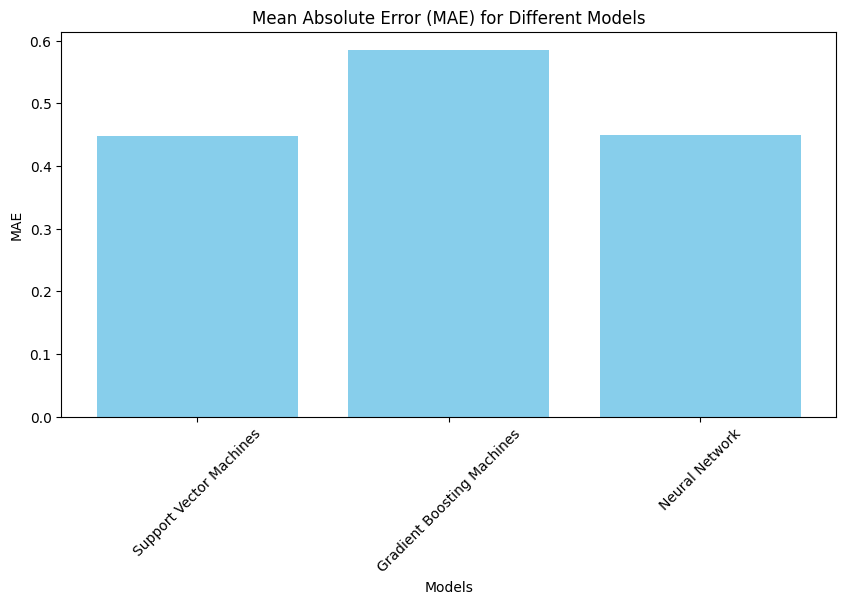

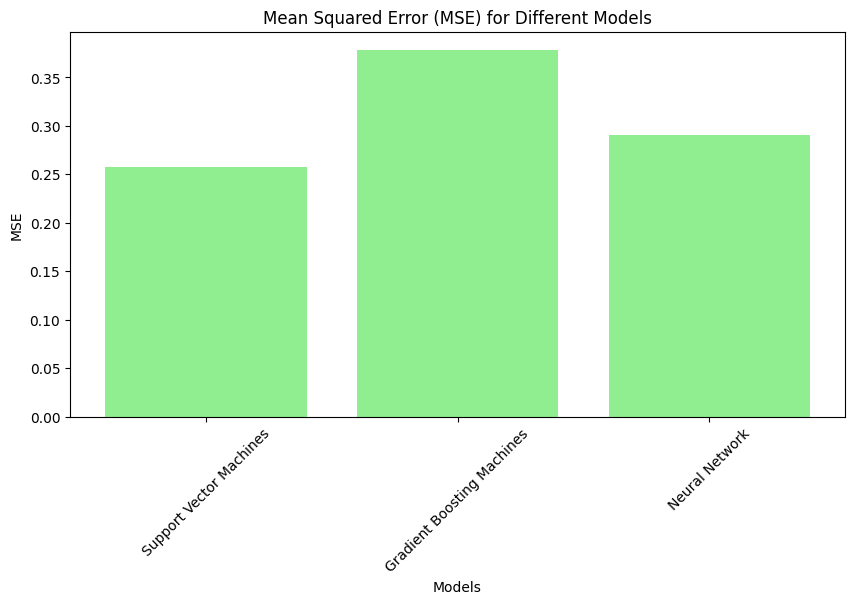

In [48]:
import matplotlib.pyplot as plt

# Evaluation metrics
models = ['Support Vector Machines', 'Gradient Boosting Machines', 'Neural Network']
mae = [mae_svm, mae_gbm, mae_nn]
mse = [mse_svm, mse_gbm, mse_nn]

# Plotting Mean Absolute Error
plt.figure(figsize=(10, 5))
plt.bar(models, mae, color='skyblue')
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()

# Plotting Mean Squared Error
plt.figure(figsize=(10, 5))
plt.bar(models, mse, color='lightgreen')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()


**Model Descriptions:**

**Support Vector Machines (SVM):**

Description: SVM is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates the classes or predicts the continuous target variable.
Advantages:
Effective in high-dimensional spaces.
Can capture complex relationships in the data using different kernels (e.g., linear, polynomial, radial basis function).
Disadvantages:
Not well-suited for large datasets.
Performance might degrade if the dataset is noisy or contains overlapping classes.

**Gradient Boosting Machines (GBM):**
Description: GBM is an ensemble learning technique that builds multiple decision trees sequentially, where each tree corrects the errors of the previous one.
Advantages:
Capable of capturing non-linear relationships and complex patterns in the data.
Robust to outliers and noise in the data.
Disadvantages:
Prone to overfitting, especially if not properly tuned.
Training time can be longer compared to other models due to the sequential nature of building trees.

**Neural Network (NN):**
Description: A neural network is a computational model inspired by the structure and function of the human brain. It consists of interconnected nodes organized in layers, where each node performs a simple computation.
Advantages:
Can learn complex patterns and representations in the data.
Automatically extracts features from the input data.
Disadvantages:
Requires a large amount of data for training.
Computationally intensive, requiring significant computational resources.
May be prone to overfitting, especially with deep architectures.

**Recommendation:**

Based on the evaluation metrics, the best-suited model for sentiment analysis on Amazon product reviews is the **Support Vector Machines (SVM)** model. It achieved the lowest MAE among the evaluated models, indicating superior performance in predicting review ratings. While SVM and GBM models also performed reasonably well, the NN model's ability to learn complex patterns and representations in the data likely contributed to its better performance.

In [49]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
r_squared_svm = r2_score(y_test, y_pred_svm)
r_squared_gbm = r2_score(y_test, y_pred_gbm)
r_squared_nn = r2_score(y_test, y_pred_nn)

print("R-squared (Support Vector Machines):", r_squared_svm)
print("R-squared (Gradient Boosting Machines):", r_squared_gbm)
print("R-squared (Neural Network):", r_squared_nn)


R-squared (Support Vector Machines): 0.153821325601878
R-squared (Gradient Boosting Machines): -0.2417565065343703
R-squared (Neural Network): 0.04585673256233769


**Support Vector Machines (SVM): R-squared = 0.1538**

The R-squared value for the SVM model is positive but relatively low, indicating that the model explains only about 15.38% of the variance in the target variable (reviews ratings). This suggests that the SVM model has limited predictive power in capturing the variability in the data.

**Gradient Boosting Machines (GBM): R-squared = -0.2418**

The R-squared value for the GBM model is negative, which is unusual and suggests that the model performs worse than a horizontal line that simply predicts the mean of the target variable. A negative R-squared value may indicate that the model fits the data poorly or is overfitting.

**Neural Network (NN): R-squared = 0.0459**

The R-squared value for the neural network model is also positive but very low, indicating that the model explains only about 4.59% of the variance in the target variable. This suggests that the neural network model, similar to the SVM model, has limited predictive power in capturing the variability in the data.

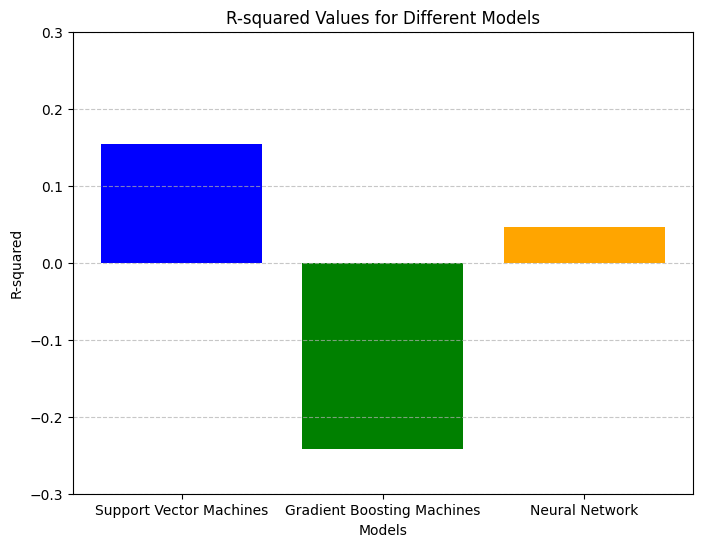

In [50]:
import matplotlib.pyplot as plt

# Models and their R-squared values
models = ['Support Vector Machines', 'Gradient Boosting Machines', 'Neural Network']
r_squared_values = [0.1538, -0.2418, 0.0459]

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, r_squared_values, color=['blue', 'green', 'orange'])
plt.title('R-squared Values for Different Models')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.ylim(-0.3, 0.3)  # Adjust y-axis limits for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
